In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [8]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [22]:
df['price'] = df['price'].astype('float')

In [34]:
df = df[df['horsepower'] != '?']

In [35]:
df['horsepower'] = df['horsepower'].astype('float')

C:\Users\Divyansh\AppData\Local\Temp\ipykernel_34172\2841366042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].astype('float')


In [23]:
df = df[df['price']!= '?']

In [24]:
df['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [29]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [28]:
df['fuel-type'].value_counts()

fuel-type
gas       181
diesel     20
Name: count, dtype: int64

In [36]:
df.groupby('fuel-type')[['horsepower', 'engine-size']].mean()

,horsepower,engine-size
fuel-type,,
diesel,84.450000,135.700000
gas,105.513966,125.832402


C:\Users\Divyansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

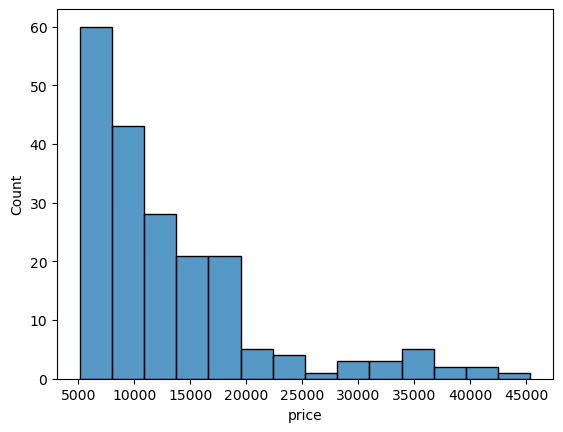

In [41]:
sns.histplot(df['price'])

In [43]:
df.groupby(['make','body-style'])['price'].describe()

count          mean           std      min  \
make          body-style                                                
alfa-romero   convertible    2.0  14997.500000   2124.855877  13495.0   
              hatchback      1.0  16500.000000           NaN  16500.0   
audi          sedan          5.0  17647.000000   3815.893735  13950.0   
              wagon          1.0  18920.000000           NaN  18920.0   
bmw           sedan          8.0  26118.750000   9263.832033  16430.0   
chevrolet     hatchback      2.0   5723.000000    808.930158   5151.0   
              sedan          1.0   6575.000000           NaN   6575.0   
dodge         hatchback      5.0   7819.800000   3006.099583   5572.0   
              sedan          3.0   7619.666667    933.045729   6692.0   
              wagon          1.0   8921.000000           NaN   8921.0   
honda         hatchback      7.0   7054.428571   1173.560232   5399.0   
              sedan          5.0   9945.000000   2092.546296   7295.0   
              wagon          1.0   7295.000000           NaN   7295.0   
isuzu         hatchback      1.0  11048.000000           NaN  11048.0   
              sedan          1.0   6785.000000           NaN   6785.0   
jaguar        sedan          3.0  34600.000000   2047.559523  32250.0   
mazda         hatchback     10.0  10085.000000   3353.671288   5195.0   
              sedan          7.0  11464.142857   4896.271725   6695.0   
mercedes-benz convertible    1.0  35056.000000           NaN  35056.0   
              hardtop        2.0  36788.000000  12179.207199  28176.0   
              sedan          4.0  33074.000000   6381.594785  25552.0   
              wagon          1.0  28248.000000           NaN  28248.0   
mercury       hatchback      1.0  16503.000000           NaN  16503.0   
mitsubishi    hatchback      9.0   9597.888889   3601.921169   5389.0   
              sedan          4.0   8434.000000   1091.802790   6989.0   
nissan        hardtop        1.0   8249.000000           NaN   8249.0   
              hatchback      5.0  14409.000000   5594.461547   7799.0   
              sedan          9.0   8604.555556   2969.579562   5499.0   
              wagon          3.0   9915.666667   3896.258889   7349.0   
peugot        sedan          7.0  15758.571429   2382.235845  11900.0   
              wagon          4.0  15017.500000   2238.349466  12440.0   
plymouth      hatchback      4.0   8130.500000   3248.643255   5572.0   
              sedan          2.0   7150.500000    648.416918   6692.0   
              wagon          1.0   8921.000000           NaN   8921.0   
porsche       convertible    1.0  37028.000000           NaN  37028.0   
              hardtop        2.0  33278.000000   1060.660172  32528.0   
              hatchback      1.0  22018.000000           NaN  22018.0   
saab          hatchback      3.0  15013.333333   3150.084655  11850.0   
              sedan          3.0  15433.333333   3225.683390  12170.0   
subaru        hatchback      3.0   6591.333333   1305.242634   5118.0   
              sedan          5.0   9070.600000   1663.321166   7126.0   
              wagon          4.0   9342.000000   1963.120136   7463.0   
toyota        convertible    1.0  17669.000000           NaN  17669.0   
              hardtop        3.0   9762.333333   1379.142246   8449.0   
              hatchback     14.0   9616.000000   3362.920503   5348.0   
              sedan         10.0   9542.200000   2503.469317   6938.0   
              wagon          4.0   9836.000000   4015.193146   6918.0   
volkswagen    convertible    1.0  11595.000000           NaN  11595.0   
              hatchback      1.0   9980.000000           NaN   9980.0   
              sedan          9.0   9673.888889   2332.736829   7775.0   
              wagon          1.0  12290.000000           NaN  12290.0   
volvo         sedan          8.0  18726.875000   3413.340360  12940.0   
              wagon          3.0  16293.333333   2774.150020  13415.0   

           

In [49]:
df[df['price'] == df['price'].max()][['price','make']]

,price,make
74,45400.0,mercedes-benz


In [50]:
df[df['price'] == df['price'].min()][['price','make']]

,price,make
138,5118.0,subaru


In [44]:
df.groupby('make')['price'].max()

make
alfa-romero      16500.0
audi             23875.0
bmw              41315.0
chevrolet         6575.0
dodge            12964.0
honda            12945.0
isuzu            11048.0
jaguar           36000.0
mazda            18344.0
mercedes-benz    45400.0
mercury          16503.0
mitsubishi       14869.0
nissan           19699.0
peugot           18150.0
plymouth         12764.0
porsche          37028.0
saab             18620.0
subaru           11694.0
toyota           17669.0
volkswagen       13845.0
volvo            22625.0
Name: price, dtype: float64

In [45]:
df.groupby('make')['price'].min()

make
alfa-romero      13495.0
audi             13950.0
bmw              16430.0
chevrolet         5151.0
dodge             5572.0
honda             5399.0
isuzu             6785.0
jaguar           32250.0
mazda             5195.0
mercedes-benz    25552.0
mercury          16503.0
mitsubishi        5389.0
nissan            5499.0
peugot           11900.0
plymouth          5572.0
porsche          22018.0
saab             11850.0
subaru            5118.0
toyota            5348.0
volkswagen        7775.0
volvo            12940.0
Name: price, dtype: float64

In [113]:
df.groupby('make')['price'].mean().idxmin()

'chevrolet'

In [52]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<Axes: >

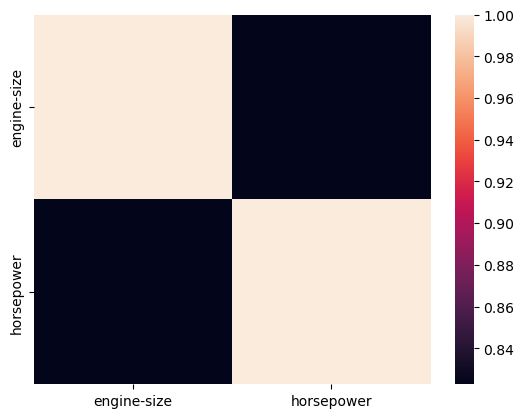

In [54]:
sns.heatmap(df[['engine-size','horsepower']].corr())

In [56]:
df[['price','engine-size','horsepower','city-mpg','highway-mpg']].corr()

,price,engine-size,horsepower,city-mpg,highway-mpg
price,1.000000,0.873887,0.810533,-0.689253,-0.705230
engine-size,0.873887,1.000000,0.822713,-0.650552,-0.679688
horsepower,0.810533,0.822713,1.000000,-0.822617,-0.804596
city-mpg,-0.689253,-0.650552,-0.822617,1.000000,0.972777
highway-mpg,-0.705230,-0.679688,-0.804596,0.972777,1.000000


In [95]:
df['city-mpg'].min()

13

In [96]:
df['highway-mpg'].min()

16

In [94]:
# Compute the minimum values for the relevant columns
min_city_mpg = df['city-mpg'].min()
min_highway_mpg = df['highway-mpg'].min()

# Create boolean masks for each condition
mask_city_mpg = df['city-mpg'] == min_city_mpg
mask_highway_mpg = df['highway-mpg'] == min_highway_mpg

# Combine the masks to filter the DataFrame
result = df[mask_city_mpg | mask_highway_mpg]
result

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,?,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000,13,17,36000.0
73,0,?,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.8,3.35,8.0,184.0,4500,14,16,40960.0
74,1,?,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.8,3.35,8.0,184.0,4500,14,16,45400.0


In [105]:
df[['city-mpg','highway-mpg','make']].min()

city-mpg                13
highway-mpg             16
make           alfa-romero
dtype: object

In [106]:
df[['city-mpg','highway-mpg','make']].max()

city-mpg          49
highway-mpg       54
make           volvo
dtype: object

In [114]:
highest_city_mpg = df.loc[df['city-mpg'].idxmax(), 'make']

In [116]:
df.loc[df['city-mpg'].idxmax()]

symboling                    2
normalized-losses          137
make                     honda
fuel-type                  gas
aspiration                 std
num-of-doors               two
body-style           hatchback
drive-wheels               fwd
engine-location          front
wheel-base                86.6
length                   144.6
width                     63.9
height                    50.8
curb-weight               1713
engine-type                ohc
num-of-cylinders          four
engine-size                 92
fuel-system               1bbl
bore                      2.91
stroke                    3.41
compression-ratio          9.6
horsepower                58.0
peak-rpm                  4800
city-mpg                    49
highway-mpg                 54
price                   6479.0
Name: 30, dtype: object

In [115]:
highest_city_mpg

'honda'

In [117]:
fuel_efficiency_by_drive_type = df.groupby('drive-wheels')[['city-mpg', 'highway-mpg']].mean()

In [118]:
fuel_efficiency_by_drive_type

,city-mpg,highway-mpg
drive-wheels,,
4wd,24.000000,27.875000
fwd,28.241379,34.129310
rwd,20.626667,25.653333


C:\Users\Divyansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Divyansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='make', ylabel='body-style'>

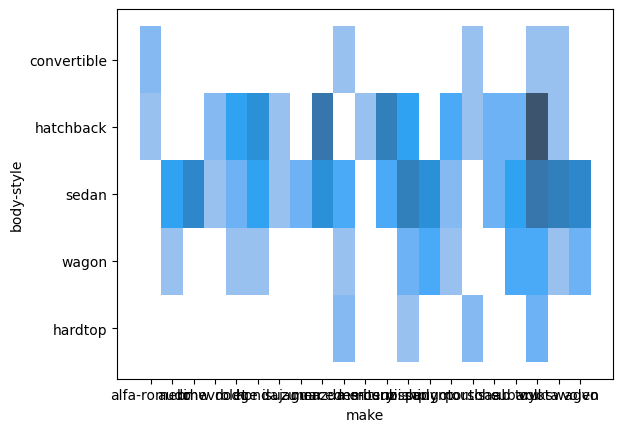

In [111]:
sns.histplot(x='make',y='body-style',data=df)


In [131]:
df.groupby('make')['body-style'].value_counts().unstack()

body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
alfa-romero,2.0,NaN,1.0,NaN,NaN
audi,NaN,NaN,NaN,5.0,1.0
bmw,NaN,NaN,NaN,8.0,NaN
chevrolet,NaN,NaN,2.0,1.0,NaN
dodge,NaN,NaN,5.0,3.0,1.0
honda,NaN,NaN,7.0,5.0,1.0
isuzu,NaN,NaN,1.0,1.0,NaN
jaguar,NaN,NaN,NaN,3.0,NaN
mazda,NaN,NaN,10.0,7.0,NaN


In [136]:
df.groupby(['make', 'body-style'])['num-of-doors'].value_counts().unstack().fillna(0)

num-of-doors                 ?  four  two
make          body-style                 
alfa-romero   convertible  0.0   0.0  2.0
              hatchback    0.0   0.0  1.0
audi          sedan        0.0   4.0  1.0
              wagon        0.0   1.0  0.0
bmw           sedan        0.0   5.0  3.0
chevrolet     hatchback    0.0   0.0  2.0
              sedan        0.0   1.0  0.0
dodge         hatchback    0.0   1.0  4.0
              sedan        1.0   2.0  0.0
              wagon        0.0   1.0  0.0
honda         hatchback    0.0   0.0  7.0
              sedan        0.0   4.0  1.0
              wagon        0.0   1.0  0.0
isuzu         hatchback    0.0   0.0  1.0
              sedan        0.0   1.0  0.0
jaguar        sedan        0.0   2.0  1.0
mazda         hatchback    0.0   1.0  9.0
              sedan        1.0   6.0  0.0
mercedes-benz convertible  0.0   0.0  1.0
              hardtop      0.0   0.0  2.0
              sedan        0.0   4.0  0.0
              wagon        0.0   1.0  0.0
mercury       hatchback    0.0   0.0  1.0
mitsubishi    hatchback    0.0   0.0  9.0
              sedan        0.0   4.0  0.0
nissan        hardtop      0.0   0.0  1.0
              hatchback    0.0   1.0  4.0
              sedan        0.0   5.0  4.0
              wagon        0.0   3.0  0.0
peugot        sedan        0.0   7.0  0.0
              wagon        0.0   4.0  0.0
plymouth      hatchback    0.0   1.0  3.0
              sedan        0.0   2.0  0.0
              wagon        0.0   1.0  0.0
porsche       convertible  0.0   0.0  1.0
              hardtop      0.0   0.0  2.0
              hatchback    0.0   0.0  1.0
saab          hatchback    0.0   0.0  3.0
              sedan        0.0   3.0  0.0
subaru        hatchback    0.0   0.0  3.0
              sedan        0.0   5.0  0.0
              wagon        0.0   4.0  0.0
toyota        convertible  0.0   0.0  1.0
              hardtop      0.0   0.0  3.0
              hatchback    0.0   6.0  8.0
              sedan        0.0   8.0  2.0
              wagon        0.0   4.0  0.0
volkswagen    convertible  0.0   0.0  1.0
              hatchback    0.0   0.0  1.0
              sedan        0.0   7.0  2.0
              wagon        0.0   1.0  0.0
volvo         sedan        0.0   8.0  0.0
              wagon        0.0   3.0  0.0

In [137]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [142]:
df['engine-size'].value_counts().head(5)

engine-size
122    15
92     15
98     14
97     14
108    13
Name: count, dtype: int64

In [148]:
df.groupby(['fuel-type','aspiration'])[['bore','stroke','compression-ratio']].value_counts().unstack().fillna(0)

compression-ratio                 7.0   7.5   7.6   7.7   7.8   8.0   8.1   \
fuel-type aspiration bore stroke                                             
diesel    std        2.99 3.47     0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                     3.01 3.4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                     3.27 3.35     0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                     3.39 3.39     0.0   0.0   0.0   0.0   0.0   0.0   0.0   
                     3.43 3.64     0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                                ...   ...   ...   ...   ...   ...   ...   
gas       turbo      3.61 3.21     1.0   0.0   0.0   0.0   0.0   0.0   0.0   
                     3.62 2.64     0.0   0.0   0.0   2.0   0.0   0.0   0.0   
                          3.15     0.0   2.0   0.0   0.0   0.0   0.0   0.0   
                     3.78 3.12     0.0   0.0   0.0   0.0   0.0   1.0   0.0   
                          3.15     0.0   0.0   0.0   0.0   0.0   0.0   0.0   

compression-ratio                 8.3   8.4   8.5   ...  10.0  10.1  11.5  \
fuel-type aspiration bore stroke                    ...                     
diesel    std        2.99 3.47     0.0   0.0   0.0  ...   0.0   0.0   0.0   
                     3.01 3.4      0.0   0.0   0.0  ...   0.0   0.0   0.0   
                     3.27 3.35     0.0   0.0   0.0  ...   0.0   0.0   0.0   
                     3.39 3.39     0.0   0.0   0.0  ...   0.0   0.0   0.0   
                     3.43 3.64     0.0   0.0   0.0  ...   0.0   0.0   0.0   
...                                ...   ...   ...  ...   ...   ...   ...   
gas       turbo      3.61 3.21     0.0   0.0   0.0  ...   0.0   0.0   0.0   
                     3.62 2.64     0.0   0.0   0.0  ...   0.0   0.0   0.0   
                          3.15     0.0   0.0   0.0  ...   0.0   0.0   0.0   
                     3.78 3.12     0.0   0.0   0.0  ...   0.0   0.0   0.0   
                          3.15     0.0   0.0   0.0  ...   0.0   0.0   0.0   

compression-ratio                 21.0  21.5  21.9  22.0  22.5  22.7  23.0  
fuel-type aspiration bore stroke                                            
diesel    std        2.99 3.47     0.0   0.0   1.0   0.0   0.0   0.0   0.0  
                     3.01 3.4      0.0   0.0   0.0   0.0   0.0   0.0   2.0  
                     3.27 3.35     0.0   0.0   0.0   0.0   2.0   0.0   0.0  
                     3.39 3.39     0.0   0.0   0.0   0.0   0.0   1.0   0.0  
                     3.43 3.64     0.0   0.0   0.0   1.0   0.0   0.0   0.0  
...                                ...   ...   ...   ...   ...   ...   ...  
gas       turbo      3.61 3.21     0.0   0.0   0.0   0.0   0.0   0.0   0.0  
                     3.62 2.64     0.0   0.0   0.0   0.0   0.0   0.0   0.0  
                          3.15     0.0   0.0   0.0   0.0   0.0   0.0   0.0  
                     3.78 3.12     0.0   0.0   0.0   0.0   0.0   0.0   0.0  
                          3.15     0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[68 rows x 32 columns]

In [156]:
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['compression-ratio'] = pd.to_numeric(df['compression-ratio'], errors='coerce')


C:\Users\Divyansh\AppData\Local\Temp\ipykernel_34172\794344741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
C:\Users\Divyansh\AppData\Local\Temp\ipykernel_34172\794344741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
C:\Users\Divyansh\AppData\Local\Temp\ipykernel_34172\794344741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [157]:
df.groupby(['fuel-type', 'aspiration'])[['bore', 'stroke', 'compression-ratio']].mean()

bore    stroke  compression-ratio
fuel-type aspiration                                       
diesel    std         3.195714  3.428571          22.514286
          turbo       3.470769  3.516154          21.730769
gas       std         3.304342  3.205658           9.021923
          turbo       3.455652  3.340870           7.743478

In [158]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400,23,28,16845.0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300,19,25,19045.0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500,18,23,21485.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800,26,27,22470.0


In [163]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [176]:
df.groupby('make')['make'].count().idxmax()

'toyota'

In [174]:
df['make'].value_counts().head(2)

make
toyota    32
nissan    18
Name: count, dtype: int64

### Regression

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [189]:
X = df[['engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]
y = df['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Making predictions
y_pred = reg_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("\nRoot Mean Squared Error (Regression Model):", rmse)


Root Mean Squared Error (Regression Model): 5286.914824876501
